<h1>Algo Genéticos: Problemas de las N Reinas</h1>

In [39]:
import random
import cliqueGenerator
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt

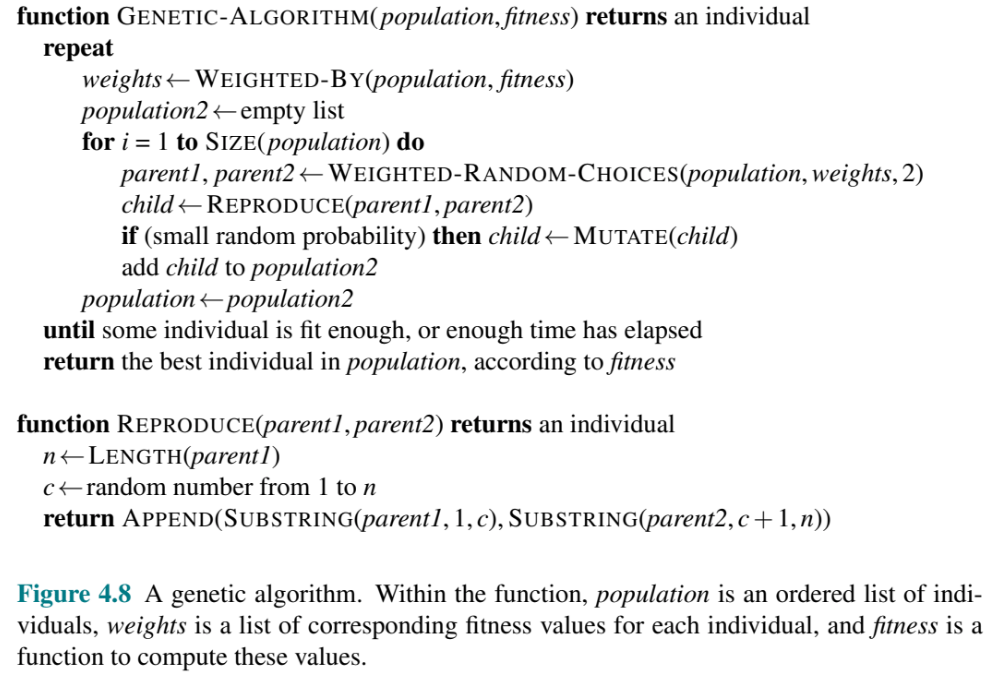

Texto guía: **Artificial Intelligence: A Modern Approach, 4th** Rusell and Norvig

<h3>Creacion de funciones</h3>

<h4> Función de preprocesamiento</h4>

In [40]:
#ACA CAMBIAN LAS DIMENSIONES DEL PROBLEMA 
input_graph=cliqueGenerator.generate_graph(100, 20)
input_graph


{0, 7, 16, 19, 22, 35, 38, 39, 54, 60, 62, 76, 78, 81, 82, 83, 86, 88, 93, 99}


{0: {3,
  6,
  7,
  12,
  16,
  19,
  20,
  21,
  22,
  24,
  25,
  29,
  31,
  33,
  35,
  38,
  39,
  41,
  42,
  43,
  46,
  47,
  49,
  52,
  53,
  54,
  57,
  60,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  74,
  75,
  76,
  78,
  80,
  81,
  82,
  83,
  86,
  87,
  88,
  91,
  92,
  93,
  94,
  97,
  99},
 1: {4,
  5,
  6,
  9,
  11,
  12,
  20,
  22,
  24,
  25,
  27,
  28,
  29,
  30,
  32,
  34,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  49,
  53,
  55,
  56,
  58,
  60,
  67,
  73,
  76,
  80,
  82,
  83,
  84,
  88,
  92,
  96,
  98,
  99},
 2: {4,
  5,
  20,
  23,
  29,
  32,
  35,
  38,
  40,
  46,
  49,
  50,
  62,
  64,
  68,
  70,
  71,
  73,
  74,
  75,
  78,
  79,
  80,
  83,
  86,
  87,
  88,
  89,
  99},
 3: {0,
  10,
  15,
  16,
  20,
  24,
  25,
  27,
  28,
  30,
  35,
  38,
  39,
  41,
  56,
  62,
  63,
  65,
  66,
  67,
  69,
  71,
  76,
  80,
  84,
  85,
  88,
  92,
  94,
  95},
 4: {1,
  2,
  5,
  8,
  9,
  11,
  15,
  17,
  23,
  30,
  32,
  33,
  34,
  36,


In [41]:
# Vamos a utilizar la librería pyeasyga que se encarga de los procesos de iteración del algoritmo. Creamos una instancia de la clase.
ga = pyeasyga.GeneticAlgorithm(input_graph,
                            population_size=50,
                            generations=100,
                            crossover_probability=0.8,
                            mutation_probability=0.2,
                            elitism=True,
                            maximise_fitness=True)

<h3>Función de creación de individuos</h3>

In [42]:
preprocessed_graph =[0]*len(input_graph)

El grafo de inicio puede ser vacio

In [43]:

def relax(preprocessed_graph,input_graph):
    n=random.randint(0,len(input_graph)//2) #numero de nodos que entran al subgrafo
    for i in range(n):
        node=random.randint(0,len(input_graph)-1)
        preprocessed_graph[node]=1
    return preprocessed_graph

Se agregan nodos al subgrafo

In [44]:
preprocessed_graph=relax(preprocessed_graph,input_graph)

In [45]:
preprocessed_graph

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [46]:
def repair(preprocessed_graph,input_graph):
    n=len(preprocessed_graph)
    idx=random.randint(0,n-1)
    for i in range(idx,n):
        if preprocessed_graph[i]==1:
            if random.randint(0,1):
                preprocessed_graph[i] = 0
            else:
                for j in range(i+1,n):
                        if preprocessed_graph[j]==1 and j not in input_graph[i] :
                            preprocessed_graph[j] = 0
                for j in range(i):
                    if preprocessed_graph[j]==1 and j not in input_graph[i] :
                            preprocessed_graph[j] = 0

    for i in range(idx,-1,-1):
        if preprocessed_graph[i]==1:
            if random.randint(0,1):
                preprocessed_graph[i] = 0
            else:
                for j in range(i-1,-1,-1):
                    if preprocessed_graph[j]==1 and j not in input_graph[i] :
                        preprocessed_graph[j] = 0
    return preprocessed_graph
                
                


Esta función es usada para extraer un clique

In [47]:
preprocessed_graph = repair(preprocessed_graph,input_graph)
preprocessed_graph

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [48]:
def extend(preprocessed_graph,input_graph):
    n=len(preprocessed_graph)
    idx=random.randint(0,n)
    for j in range(idx,n-1):
        n_j=preprocessed_graph[j]
        flag=True
        for node in range(n):
            if preprocessed_graph[node]==1 and j not in input_graph[node]:
                flag=False
                break
        if flag:    
            preprocessed_graph[j] = 1
    for j in range(1,idx):
        flag=True
        for node in range(n):
            if preprocessed_graph[node]==1 and j not in input_graph[node]:
                flag=False
                break
        if flag:    
            preprocessed_graph[j] = 1
    
    return preprocessed_graph

La función anterior se encarga de alargar el clique

In [49]:
preprocessed_graph= extend(preprocessed_graph,input_graph)
preprocessed_graph

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [50]:
def HA(preprocessed_graph,input_graph):
    preprocessed_graph=relax(preprocessed_graph,input_graph)
    preprocessed_graph=repair(preprocessed_graph,   input_graph)
    preprocessed_graph=extend(preprocessed_graph,input_graph)
    return preprocessed_graph

In [51]:
#Funcion que crea individuos, para la creacion de la poblacion inicial
def create_individual(data):
    preprocessed_graph=[0]*len(data)
    preprocessed_graph=HA(preprocessed_graph,data)
    return preprocessed_graph

    
#Ejemplos de 2 indivudos que siguen nuestra representacion
ind1=create_individual(input_graph)
ind2=create_individual(input_graph)
print(ind1)
print(ind2)

#Una vez la creamos la asignamos a nuestra instancia de ga
ga.create_individual=create_individual

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


<h3>Creación de función de crossover</h3>

La función de crossover utilizada será la de uniform crossover.

In [52]:
# Ahora definimos nuestra función de crossover
def crossover(parent_1, parent_2):
    child1=[0]*len(parent_1)
    child2=[0]*len(parent_2)

    for i in range(len(parent_1)):
        if random.randint(0,1):
            child1[i]=parent_1[i]
            child2[i]=parent_2[i]
        else:
            child1[i]=parent_2[i]
            child2[i]=parent_1[i]
    return child1, child2

#Ejemplo de operador de crossover
print(crossover(ind1,ind2))


#Una vez la creamos la asignamos a nuestra instancia ga.
ga.crossover_function = crossover

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])


<h3>Creamos la función de mutación</h3>

In [53]:
#Definimos la función de mutación
def mutate(individual):
    for i in range(len(individual)):
        if random.random()< ga.mutation_probability:
            individual[i]=1-individual[i]
    
    return individual
print(ind1)
mutate(ind1)
print(ind1)

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.mutate_function = mutate

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]


In [54]:
# Función de selección!!, población es un objeto que contiene los individuos y sus atributos como la función de fitness
def selection(population):
    population.sort(key=lambda x: x.fitness, reverse=True)
    return population[0]

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.selection_function = selection

La función de selección se encarga de escoger a los 2 indivudos con mayor fitness

In [55]:
# Función de fitness: probablemente la mas importante
def fitness (individual,data):
    individual=HA(individual,data)
    return sum(individual)
    
# Ejemplo cuanto es el tamaño de la clique de este individuo
print(fitness(ind1,input_graph))

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.fitness_function = fitness       


19


<h2>Ejecutando unas cuantas Generaciones</h2>

In [56]:


ga.create_first_generation()
def datos_generacion():
    average_fitness=[]
    generations=[]
    best_individual=[]

    for j in range(1,11):
        fitness = [ i.fitness for i in ga.current_generation]
        average=sum(fitness)/len(fitness)

        average_fitness.append(average)
        generations.append(j)
        ga.create_next_generation()
        best_individual.append(ga.best_individual()[0])
    return average_fitness,generations,best_individual
average_fitness,generations,best_individual=datos_generacion()

(19, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])
(19, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])
(19, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])
(19, [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0

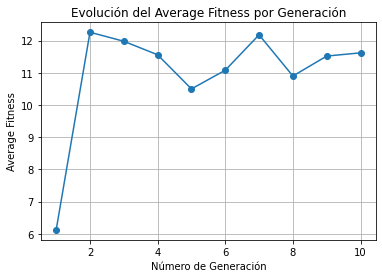

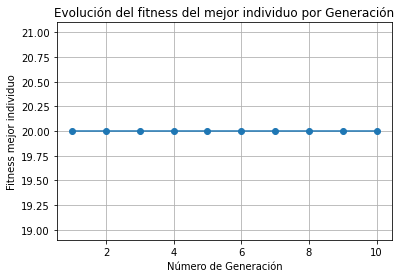

In [57]:
# Crea el gráfico del "average fitness" por generación
plt.plot(generations, average_fitness, marker='o', linestyle='-')

# Etiqueta de los ejes
plt.xlabel('Número de Generación')
plt.ylabel('Average Fitness')

# Título del gráfico
plt.title('Evolución del Average Fitness por Generación')

# Muestra el gráfico
plt.grid(True)
plt.show()

plt.plot(generations, best_individual, marker='o', linestyle='-')

# Etiqueta de los ejes
plt.xlabel('Número de Generación')
plt.ylabel('Fitness mejor individuo')

# Título del gráfico
plt.title('Evolución del fitness del mejor individuo por Generación')

# Muestra el gráfico
plt.grid(True)
plt.show()




